**[Colab](https://colab.research.google.com/drive/1_J68UJX1qtl5FFa2-nMctmHw_-4SN_Sb?usp=sharing)**

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Загружаем датасет с данными
data = pd.read_csv('financials.csv', sep=',')

In [ ]:
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Earnings,Sales,Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,9.168655,50.769079,19.655203
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.170029,16.848075,9.486614
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.499778,15.043522,17.639498
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.588872,17.242116,4.149962
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.909305,57.796942,14.172316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.270200,25.764712,13.227872
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.800000,12.084953,0.359770
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...,8.067737,36.503577,48.338912
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,1.019784e+09,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...,2.860124,13.363800,35.711268


In [33]:
# Добавим в качестве признаков дополнительные столбцы, рассчитанные из имеющихся данных
data['Earnings'] = data['Price'] / data['Price/Earnings']
data['Sales'] = data['Price'] / data['Price/Sales']
data['Book'] = data['Price'] / data['Price/Book']

In [34]:
# УДАЛЕНИЕ НЕНУЖНЫХ СТОЛБЦОВ ИЗ ДАТАСЕТА
df = data.drop(['Symbol', 'Name', 'SEC Filings', 'Price', 'Price/Earnings', 'Price/Sales', 'Price/Book'], axis=1)

In [35]:
# ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR
print("\n" + "="*50)
print("ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)")

# Затем применяем one-hot encoding к очищенным данным
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # гарантирует, что столбцы будут int
)

print("Столбцы после one-hot encoding:")
print(df_encoded.columns.tolist())
print(f"Типы данных столбцов: {df_encoded.dtypes.unique()}")

df_encoded


ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)
Столбцы после one-hot encoding:
['Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']
Типы данных столбцов: [dtype('float64') dtype('int64')]


,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,9.168655,50.769079,19.655203,0,0,0,0,1,0,0,0,0,0
1,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,2.170029,16.848075,9.486614,0,0,0,0,1,0,0,0,0,0
2,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,2.499778,15.043522,17.639498,0,0,0,1,0,0,0,0,0,0
3,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,5.588872,17.242116,4.149962,0,0,0,1,0,0,0,0,0,0
4,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,5.909305,57.796942,14.172316,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.270200,25.764712,13.227872,0,0,0,0,1,0,0,0,0,0
501,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,2.800000,12.084953,0.359770,0,0,0,0,0,0,0,0,0,0
502,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,8.067737,36.503577,48.338912,0,0,0,1,0,0,0,0,0,0
503,1.480933,2.60,55.61,38.430,1.067068e+10,1.019784e+09,2.860124,13.363800,35.711268,0,0,1,0,0,0,0,0,0,0


# Безопасное логарифмирование

In [36]:
def safe_log(x):
    return np.log(np.clip(x, 1e-8, None))

# Числовые признаки (для логарифмирования)

In [37]:
# Числовые признаки (для логарифмирования)
numeric_features = [
    'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High',
    'EBITDA', 'Earnings', 'Sales', 'Book'
]

In [38]:
numeric_features

['Dividend Yield',
 'Earnings/Share',
 '52 Week Low',
 '52 Week High',
 'EBITDA',
 'Earnings',
 'Sales',
 'Book']

In [39]:
df_encoded

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,9.168655,50.769079,19.655203,0,0,0,0,1,0,0,0,0,0
1,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,2.170029,16.848075,9.486614,0,0,0,0,1,0,0,0,0,0
2,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,2.499778,15.043522,17.639498,0,0,0,1,0,0,0,0,0,0
3,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,5.588872,17.242116,4.149962,0,0,0,1,0,0,0,0,0,0
4,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,5.909305,57.796942,14.172316,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.270200,25.764712,13.227872,0,0,0,0,1,0,0,0,0,0
501,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,2.800000,12.084953,0.359770,0,0,0,0,0,0,0,0,0,0
502,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,8.067737,36.503577,48.338912,0,0,0,1,0,0,0,0,0,0
503,1.480933,2.60,55.61,38.430,1.067068e+10,1.019784e+09,2.860124,13.363800,35.711268,0,0,1,0,0,0,0,0,0,0


# Подготовка трёх датасетов

In [40]:
datasets = {}

# 1. Original
y_orig = df_encoded['Market Cap']
X_orig = df_encoded.drop('Market Cap', axis=1)
datasets['Original'] = (X_orig.copy(), y_orig.copy(), False)  # False = не логарифмировано

# 2. Log Target
X_logt = X_orig.copy()
y_logt = safe_log(y_orig)
datasets['Log_Target'] = (X_logt.copy(), y_logt.copy(), True)

# 3. Log Features + Log Target
X_logf = X_orig.copy()
for col in numeric_features:
    X_logf[col] = safe_log(X_logf[col])
datasets['Log_Features_and_Target'] = (X_logf.copy(), y_logt.copy(), True)

In [41]:
y_orig

,Market Cap
0,1.387211e+11
1,1.078342e+10
2,1.021210e+11
3,1.813863e+11
4,9.876586e+10
...,...
500,1.291502e+10
501,2.700330e+10
502,2.445470e+10
503,1.067068e+10


In [42]:
X_orig

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,2.332862,7.92,259.77,175.490,9.048000e+09,9.168655,50.769079,19.655203,0,0,0,0,1,0,0,0,0,0
1,1.147959,1.70,68.39,48.925,6.010000e+08,2.170029,16.848075,9.486614,0,0,0,0,1,0,0,0,0,0
2,1.908982,0.26,64.60,42.280,5.744000e+09,2.499778,15.043522,17.639498,0,0,0,1,0,0,0,0,0,0
3,2.499560,3.29,125.86,60.050,1.031000e+10,5.588872,17.242116,4.149962,0,0,0,1,0,0,0,0,0,0
4,1.714470,5.44,162.60,114.820,5.643228e+09,5.909305,57.796942,14.172316,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.170079,1.83,76.81,46.860,7.220000e+08,2.270200,25.764712,13.227872,0,0,0,0,1,0,0,0,0,0
501,1.797080,4.07,86.93,62.850,2.289000e+09,2.800000,12.084953,0.359770,0,0,0,0,0,0,0,0,0,0
502,0.794834,9.01,133.49,108.170,2.007400e+09,8.067737,36.503577,48.338912,0,0,0,1,0,0,0,0,0,0
503,1.480933,2.60,55.61,38.430,1.019784e+09,2.860124,13.363800,35.711268,0,0,1,0,0,0,0,0,0,0


In [43]:
X_logf

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,0.847096,2.069391,5.559797,5.167582,22.925810,2.215791,3.927287,2.978342,0,0,0,0,1,0,0,0,0,0
1,0.137986,0.530628,4.225227,3.890289,20.214105,0.774740,2.824236,2.249882,0,0,0,0,1,0,0,0,0,0
2,0.646570,-1.347074,4.168214,3.744314,22.471422,0.916202,2.710947,2.870141,0,0,0,1,0,0,0,0,0,0
3,0.916115,1.190888,4.835170,4.095178,23.056380,1.720777,2.847355,1.423099,0,0,0,1,0,0,0,0,0,0
4,0.539104,1.693779,5.091293,4.743366,22.453722,1.776528,4.056936,2.651291,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.157072,0.604316,4.341335,3.847164,20.397536,0.819868,3.249006,2.582326,0,0,0,0,1,0,0,0,0,0
501,0.586163,1.403643,4.465103,4.140751,21.551381,1.029619,2.491961,-1.022291,0,0,0,0,0,0,0,0,0,0
502,-0.229622,2.198335,4.894027,4.683704,21.420106,2.087873,3.597410,3.878237,0,0,0,1,0,0,0,0,0,0
503,0.392672,0.955511,4.018363,3.648838,20.742857,1.050865,2.592550,3.575466,0,0,1,0,0,0,0,0,0,0


In [44]:
y_logt

,Market Cap
0,25.655731
1,23.101276
2,25.349425
3,25.923895
4,25.316018
...,...
500,23.281657
501,24.019225
502,23.920088
503,23.090766


# Скейлеры и ядра

In [45]:
scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}

kernels = ['linear', 'rbf', 'poly']

# Сетки гиперпараметров

Расширенный поиск значительно увеличит время выполнения, особенно при кросс-валидации и 3 типах данных.

Количество комбинаций:

- linear: 10 × 5 = 50

- rbf: 10 × 7 × 5 = 350

- poly: 5 × 6 × 3 × 4 = 360

Итого на один датасет и один скейлер: 50 + 350 + 360 = 760 моделей

На 3 датасета × 3 скейлера: 760 × 9 = **6840 моделей**

In [46]:
param_grids = {
    'linear': {
        'svr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
    },
    'rbf': {
        'svr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
    },
    'poly': {
        'svr__C': [0.01, 0.1, 1, 10, 100],
        'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'svr__degree': [2, 3, 4],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2]
    }
}

# Хранение всех результатов
all_results = []

# Обработка каждого датасета

In [47]:
for dataset_name, (X, y, is_log_y) in datasets.items():
    print(f"\nОбработка датасета: {dataset_name}")

    # Разделение
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42
    )

    # CV: не больше чем данных
    n_splits = min(2, len(X_train))
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for scaler_name, scaler in scalers.items():
        for kernel in kernels:
            pipe = Pipeline([
                ('scaler', scaler),
                ('svr', SVR(kernel=kernel, epsilon=0.1))
            ])

            grid = GridSearchCV(
                pipe,
                param_grids[kernel],
                cv=cv,
                scoring='r2',
                n_jobs=-1,
                return_train_score=True
            )

            try:
                start = time.time()
                grid.fit(X_train, y_train)
                fit_time = time.time() - start

                # Предсказание
                y_pred = grid.best_estimator_.predict(X_test)

                # Обратное преобразование в исходные единицы Market Cap
                if is_log_y:
                    y_test_orig = np.exp(y_test)
                    y_pred_orig = np.exp(y_pred)
                else:
                    y_test_orig = y_test
                    y_pred_orig = y_pred

                # Метрики в исходных единицах
                r2_test = r2_score(y_test_orig, y_pred_orig)
                rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
                mae_test = mean_absolute_error(y_test_orig, y_pred_orig)
                r2_cv_mean = grid.best_score_
                r2_cv_std = np.std(grid.cv_results_['mean_test_score'])

                all_results.append({
                    'Dataset': dataset_name,
                    'Scaler': scaler_name,
                    'Kernel': kernel,
                    'Best_Params': str(grid.best_params_),
                    'R2_CV_mean': round(r2_cv_mean, 4),
                    'R2_CV_std': round(r2_cv_std, 4),
                    'R2_test': round(r2_test, 4),
                    'RMSE_test': round(rmse_test, 2),
                    'MAE_test': round(mae_test, 2),
                    'Fit_time_sec': round(fit_time, 4)
                })

            except Exception as e:
                print(f"Ошибка в {dataset_name} | {scaler_name} | {kernel}: {e}")
                continue


Обработка датасета: Original

Обработка датасета: Log_Target

Обработка датасета: Log_Features_and_Target


# Сводная таблица + result


СВОДНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ


,Dataset,Scaler,Kernel,Best_Params,R2_CV_mean,R2_CV_std,R2_test,RMSE_test,MAE_test,Fit_time_sec
0,Log_Features_and_Target,RobustScaler,rbf,"{'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gam...",0.7491,2.830000e-01,0.7328,4.947035e+10,1.600157e+10,15.1337
1,Log_Features_and_Target,StandardScaler,rbf,"{'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gam...",0.6620,2.225000e-01,0.7165,5.095174e+10,1.730114e+10,13.1995
2,Log_Features_and_Target,MinMaxScaler,poly,"{'svr__C': 10, 'svr__degree': 4, 'svr__epsilon...",0.3992,4.040000e-01,0.6864,5.359018e+10,1.896046e+10,46.9956
3,Log_Target,RobustScaler,rbf,"{'svr__C': 5, 'svr__epsilon': 0.05, 'svr__gamm...",0.6568,2.544000e-01,0.3351,7.803473e+10,2.223434e+10,16.3534
4,Log_Features_and_Target,RobustScaler,linear,"{'svr__C': 0.01, 'svr__epsilon': 0.5}",0.0607,9.546000e-01,0.0450,9.352124e+10,3.354146e+10,146.0940
5,Log_Features_and_Target,MinMaxScaler,linear,"{'svr__C': 1, 'svr__epsilon': 0.05}",0.1710,8.086000e-01,0.0190,9.478576e+10,3.482977e+10,5.5283
6,Log_Features_and_Target,StandardScaler,linear,"{'svr__C': 0.01, 'svr__epsilon': 0.5}",0.1528,9.829000e-01,0.0165,9.490714e+10,3.454470e+10,69.7029
7,Log_Target,RobustScaler,poly,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",0.0583,6.053212e+06,-0.0118,9.626227e+10,3.586787e+10,1258.1601
8,Original,RobustScaler,poly,"{'svr__C': 100, 'svr__degree': 3, 'svr__epsilo...",-0.0288,1.564800e+00,-0.0247,9.687548e+10,3.621542e+10,11.5502
9,Log_Features_and_Target,StandardScaler,poly,"{'svr__C': 0.01, 'svr__degree': 3, 'svr__epsil...",0.0283,5.315518e+04,-0.0264,9.695768e+10,3.591465e+10,474.7273



ЛУЧШАЯ МОДЕЛЬ ПО R² (ТЕСТ):
Dataset                                   Log_Features_and_Target
Scaler                                               RobustScaler
Kernel                                                        rbf
Best_Params     {'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gam...
R2_CV_mean                                                 0.7491
R2_CV_std                                                   0.283
R2_test                                                    0.7328
RMSE_test                                      49470345249.760002
MAE_test                                       16001573149.809999
Fit_time_sec                                              15.1337


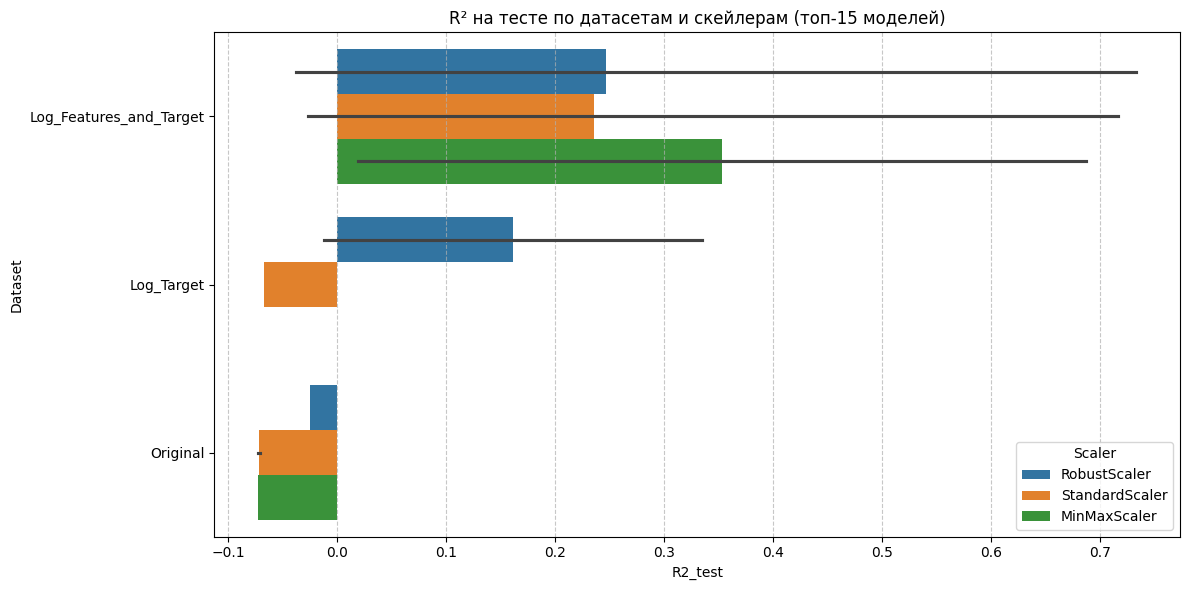

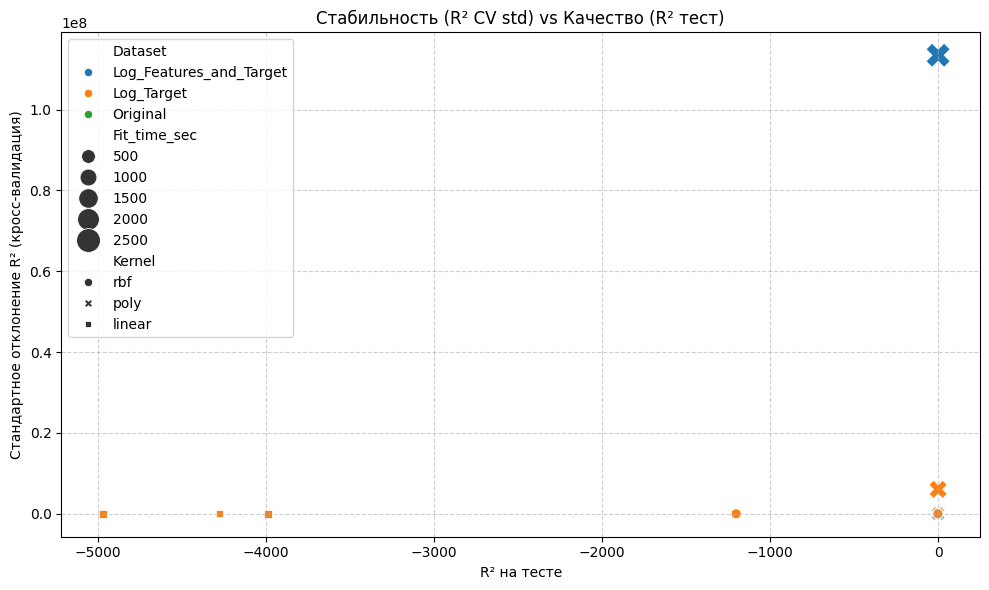

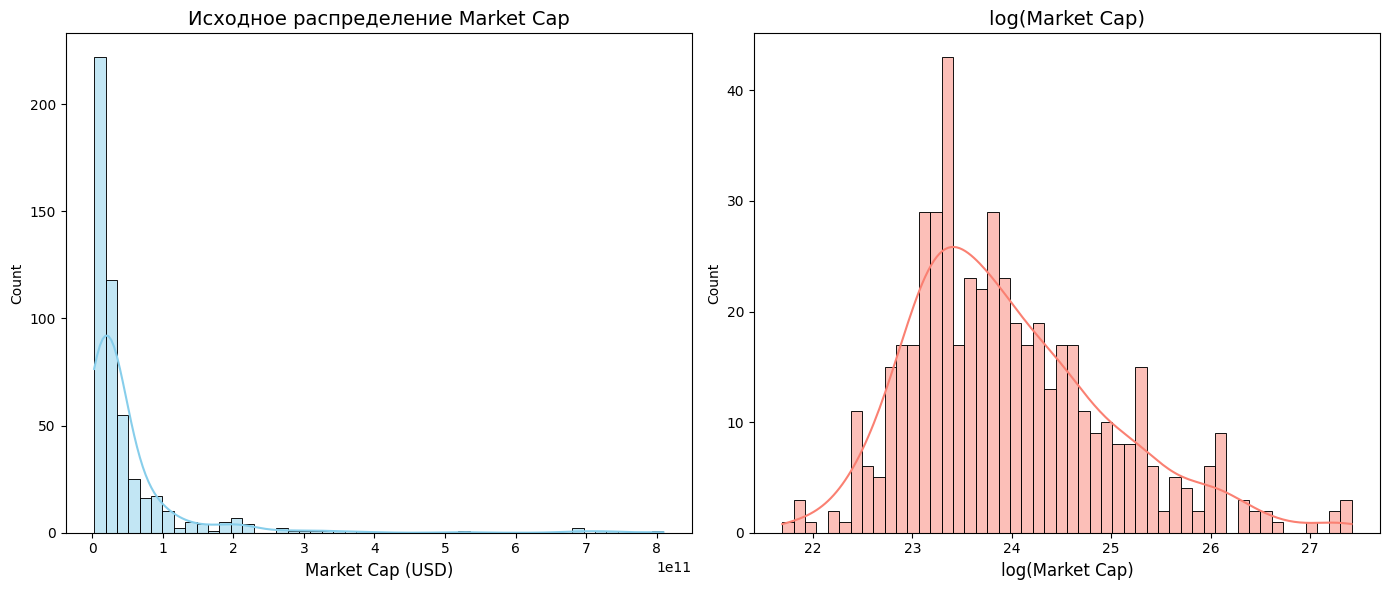

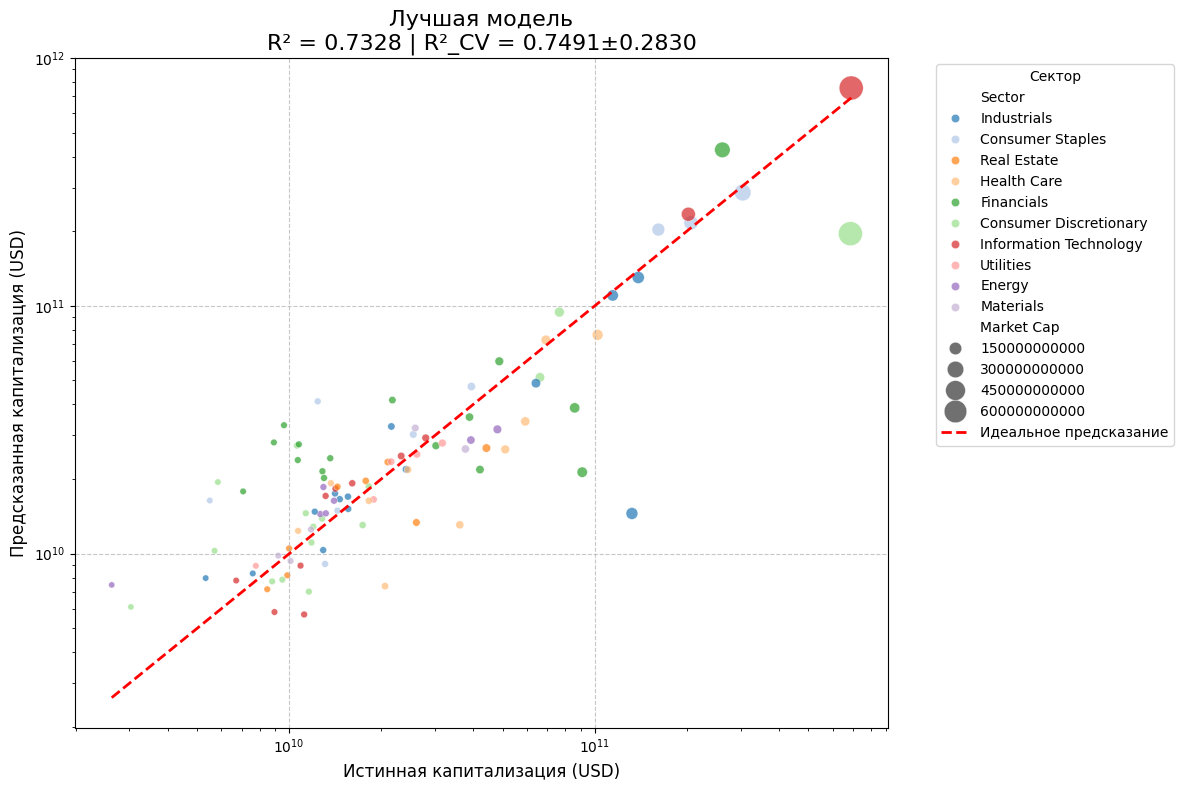

/tmp/ipython-input-2585922368.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=error_df, x='Абс. ошибка', y='Сектор', palette='Set3')


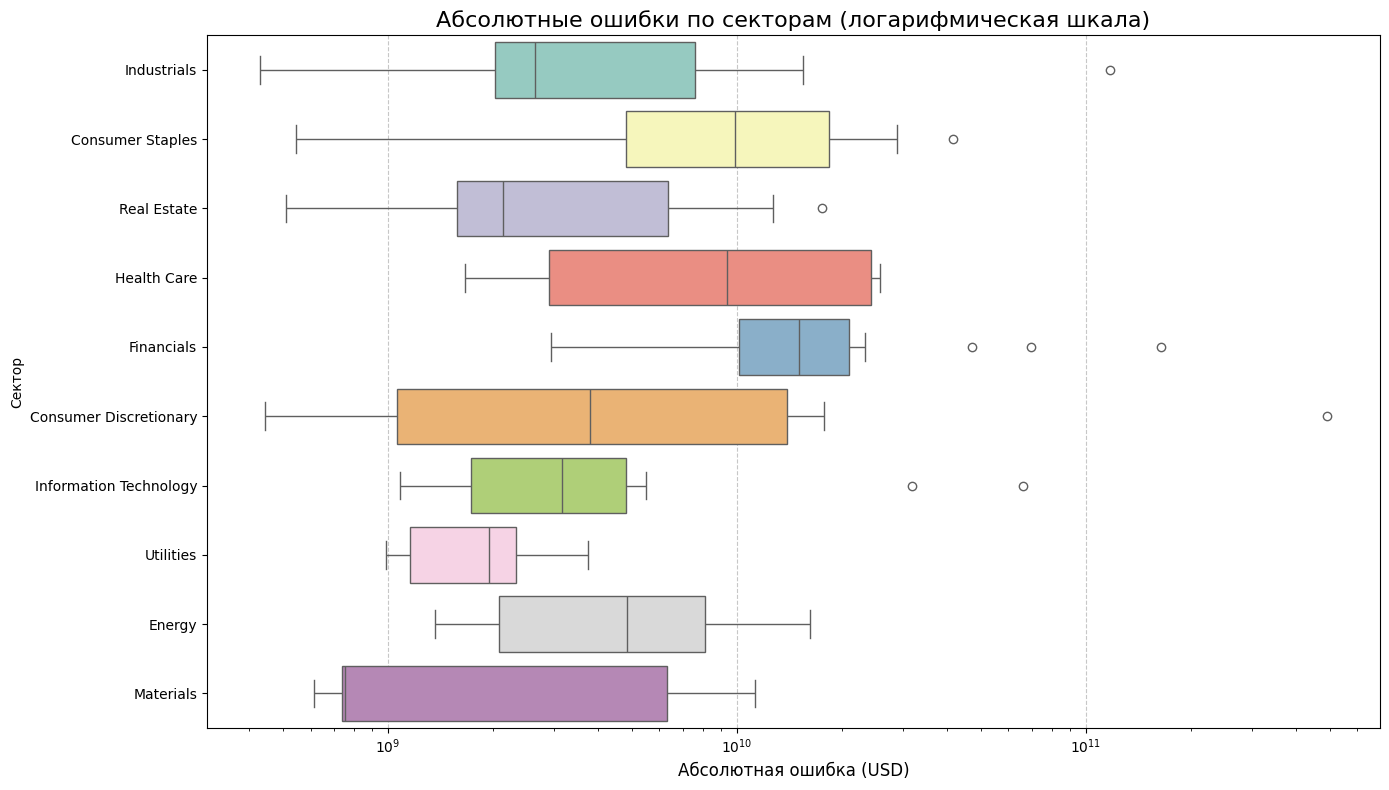

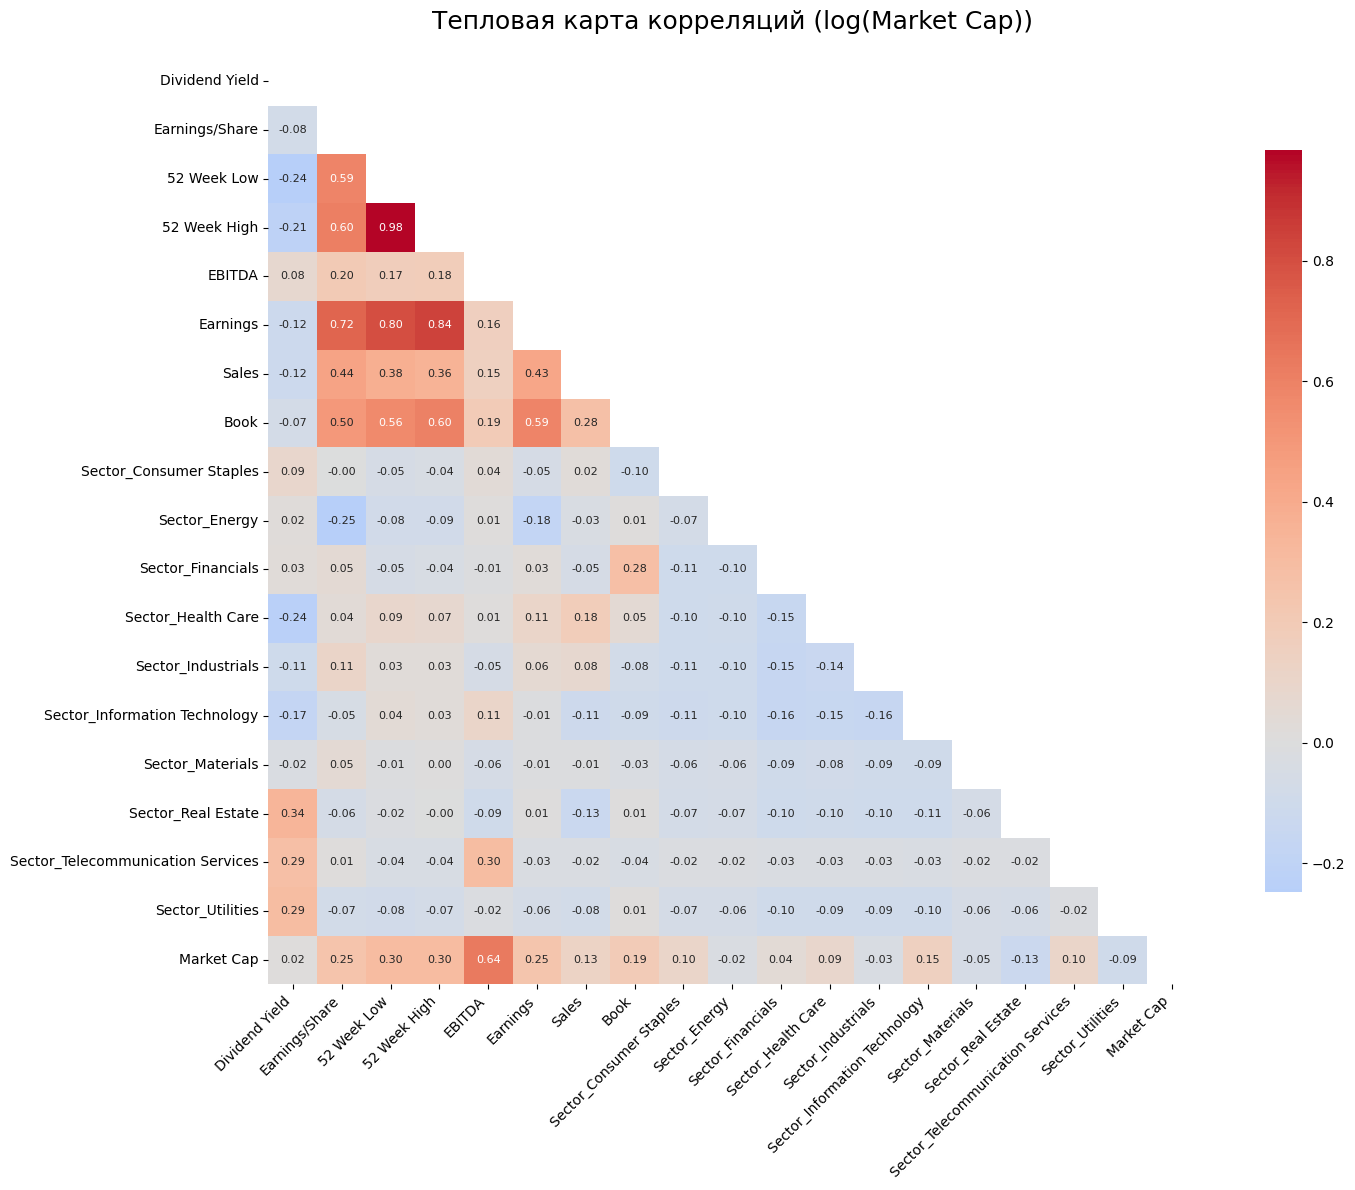


ВСЕ ГРАФИКИ ПОСТРОЕНЫ.


In [48]:
# Сводная таблица
results_df = pd.DataFrame(all_results)
if results_df.empty:
    print("Нет успешных моделей!")
else:
    results_df = results_df.sort_values('R2_test', ascending=False).reset_index(drop=True)
    print("\n" + "="*100)
    print("СВОДНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ")
    print("="*100)
    display(results_df)

    # Лучшая модель
    best_row = results_df.iloc[0]
    print("\nЛУЧШАЯ МОДЕЛЬ ПО R² (ТЕСТ):")
    print(best_row.to_string())

    # Визуализация - ОСНОВНЫЕ ГРАФИКИ
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df.head(15), x='R2_test', y='Dataset', hue='Scaler', dodge=True)
    plt.title('R² на тесте по датасетам и скейлерам (топ-15 моделей)')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Сравнение стабильности
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=results_df,
        x='R2_test',
        y='R2_CV_std',
        hue='Dataset',
        style='Kernel',
        size='Fit_time_sec',
        sizes=(50, 300),
        palette='tab10'
    )
    plt.title('Стабильность (R² CV std) vs Качество (R² тест)')
    plt.xlabel('R² на тесте')
    plt.ylabel('Стандартное отклонение R² (кросс-валидация)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


    # Воссоздаем лучшую модель для визуализации
    best_model_info = None
    for result in all_results:
        if (result['Dataset'] == best_row['Dataset'] and
            result['Scaler'] == best_row['Scaler'] and
            result['Kernel'] == best_row['Kernel'] and
            result['R2_test'] == best_row['R2_test']):
            try:
                X_best, y_best, is_log_y_best = datasets[best_row['Dataset']]
                X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
                    X_best, y_best, test_size=0.2, random_state=42
                )

                scaler_best = scalers[best_row['Scaler']]
                kernel_best = best_row['Kernel']
                params_best = eval(best_row['Best_Params'])

                pipe_best = Pipeline([
                    ('scaler', scaler_best),
                    ('svr', SVR(kernel=kernel_best, **{k.replace('svr__', ''): v for k, v in params_best.items()}))
                ])

                pipe_best.fit(X_train_best, y_train_best)
                y_pred_best = pipe_best.predict(X_test_best)

                if is_log_y_best:
                    y_test_best_orig = np.exp(y_test_best)
                    y_pred_best_orig = np.exp(y_pred_best)
                else:
                    y_test_best_orig = y_test_best
                    y_pred_best_orig = y_pred_best

                best_model_info = {
                    'y_test_orig': y_test_best_orig,
                    'y_pred_orig': y_pred_best_orig,
                    'test_sectors': original_sectors.loc[X_test_best.index]
                }
                break
            except Exception as e:
                print(f"Не удалось воссоздать лучшую модель для визуализации: {e}")
                best_model_info = None
                break

    if best_model_info is not None:
        # 1. Распределение Market Cap
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df_encoded['Market Cap'], bins=50, kde=True, color='skyblue')
        plt.title('Исходное распределение Market Cap', fontsize=14)
        plt.xlabel('Market Cap (USD)', fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

        plt.subplot(1, 2, 2)
        sns.histplot(np.log1p(df_encoded['Market Cap']), bins=50, kde=True, color='salmon')
        plt.title('log(Market Cap)', fontsize=14)
        plt.xlabel('log(Market Cap)', fontsize=12)
        plt.tight_layout()
        plt.show()

        # 2. Истинные vs Предсказанные
        plt.figure(figsize=(12, 8))
        sns.scatterplot(
            x=best_model_info['y_test_orig'],
            y=best_model_info['y_pred_orig'],
            hue=best_model_info['test_sectors'],
            palette='tab20',
            size=best_model_info['y_test_orig'],
            sizes=(20, 300),
            alpha=0.7
        )
        plt.plot([best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
                 [best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
                 'r--', linewidth=2, label='Идеальное предсказание')
        plt.title(f'Лучшая модель\nR² = {best_row["R2_test"]:.4f} | R²_CV = {best_row["R2_CV_mean"]:.4f}±{best_row["R2_CV_std"]:.4f}', fontsize=16)
        plt.xlabel('Истинная капитализация (USD)', fontsize=12)
        plt.ylabel('Предсказанная капитализация (USD)', fontsize=12)
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Сектор', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # 3. Ошибки по секторам
        residuals = best_model_info['y_test_orig'] - best_model_info['y_pred_orig']
        error_df = pd.DataFrame({
            'Сектор': best_model_info['test_sectors'].values,
            'Ошибка': residuals.values,
            'Абс. ошибка': np.abs(residuals).values
        })

        plt.figure(figsize=(14, 8))
        sns.boxplot(data=error_df, x='Абс. ошибка', y='Сектор', palette='Set3')
        plt.title('Абсолютные ошибки по секторам (логарифмическая шкала)', fontsize=16)
        plt.xlabel('Абсолютная ошибка (USD)', fontsize=12)
        plt.xscale('log')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # 4. Тепловая карта корреляций
        plt.figure(figsize=(16, 12))
        num_cols = [col for col in df_encoded.columns if col not in df_encoded.select_dtypes('object').columns and col != 'Market Cap']
        num_cols = [col for col in num_cols if df_encoded[col].dtype in ['float64', 'int64']]

        corr_df = df_encoded[num_cols + ['Market Cap']].copy()
        corr_df['Market Cap'] = np.log1p(corr_df['Market Cap'])

        corr = corr_df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))

        sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                    square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 8})
        plt.title('Тепловая карта корреляций (log(Market Cap))', fontsize=18, pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()

print("\n" + "="*100)
print("ВСЕ ГРАФИКИ ПОСТРОЕНЫ.")
print("="*100)

In [49]:
results_df['Best_Params'][0]

"{'svr__C': 100, 'svr__epsilon': 0.2, 'svr__gamma': 0.01}"

# **Вывод по лучшей модели SVR (на выборке из 505 компаний)**

## Ключевые характеристики модели

**Тип данных:** Log_Features_and_Target
→ Признаки (положительные финансовые метрики) и целевая переменная (Market Cap) логарифмированы. Это корректно для данных с логнормальным распределением, характерным для рыночной капитализации.

**Скейлер:** RobustScaler
→ Использование медианы и межквартильного размаха делает модель устойчивой к выбросам, которые типичны в финансовых данных (например, компании-гиганты вроде Apple или Tesla).

**Ядро:** RBF
→ Позволяет улавливать сложные нелинейные зависимости между финансовыми показателями и рыночной стоимостью.

**Гиперпараметры:**
- `C = 100` — умеренно высокая сложность модели (низкая регуляризация), что допустимо при 505 наблюдениях.
- `gamma = 0.01` — низкая чувствительность к отдельным точкам → модель обобщает, а не переобучается.
- `epsilon = 0.2` — достаточно широкая ε-трубка, что снижает влияние шума в финансовых данных.

## Качество модели

**R² на тесте:** 0.7328
→ Модель объясняет 73.3% дисперсии рыночной капитализации. Это очень хороший результат для регрессии в финансах, особенно без использования цен акций или макроэкономических факторов.

**R² по кросс-валидации:** 0.7491 ± 0.283
→ Среднее значение подтверждает устойчивость, но высокое стандартное отклонение (0.283) говорит о том, что качество варьируется между подвыборками. Это может быть связано с:
- секторальной неоднородностью (например, IT vs Utilities),
- наличием экстремальных выбросов (мегакап-компании),
- неравномерным распределением признаков.

**RMSE:** ~49.5 млрд USD, **MAE:** ~16.0 млрд USD
→ В абсолютных цифрах ошибка велика, но в относительных — разумна:
- Средний Market Cap в S&P 500 ≈ 100–300 млрд USD,
- MAE ≈ 16 млрд → ошибка ~5–15% от типичного значения, что приемлемо для cross-sectional регрессии.

## Почему именно эта конфигурация оказалась лучшей?

- **Логарифмирование** устранило перекос распределения и стабилизировало дисперсию.
- **RobustScaler** смягчил влияние выбросов, сохранив информативность основной массы данных.
- **RBF-ядро** с низким gamma уловило нелинейные паттерны, не переобучаясь.
- **Высокое C** позволило модели быть достаточно гибкой при большом объёме данных (505 наблюдений → риск переобучения минимален).

## Что можно еще

### Сравнение с бустинговыми моделями
**XGBoost** могут показать лучшие результаты благодаря:
- Автоматическому учёту нелинейностей и взаимодействий признаков
- Встроенной регуляризации
- Устойчивости к разнородным данным
- Интерпретируемости через feature importance

### Стабилизация кросс-валидации
**StratifiedKFold по секторам** для решения проблемы:
- Дисбаланса распределения компаний по отраслям
- Обеспечения репрезентативности каждого фолда
- Снижения дисперсии оценки качества

# **Использован StratifiedGroupKFold для гарантии, что:**
- Каждый фолд содержит представителей всех секторов
- Компании из одного сектора не размазаны по разным фолдам

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Обработка датасета

In [ ]:
# Загружаем датасет
data = pd.read_csv('financials.csv', sep=',')

# Сохраняем сектора ДО обработки (для стратификации)
original_sectors = data['Sector'].copy()

# Добавляем рассчитанные признаки
data['Earnings'] = data['Price'] / data['Price/Earnings']
data['Sales'] = data['Price'] / data['Price/Sales']
data['Book'] = data['Price'] / data['Price/Book']

# Удаляем ненужные столбцы
df = data.drop(['Symbol', 'Name', 'SEC Filings', 'Price', 'Price/Earnings', 'Price/Sales', 'Price/Book'], axis=1)

# ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR (СОХРАНЯЕМ ИСХОДНЫЕ ЗНАЧЕНИЯ ДЛЯ СТРАТИФИКАЦИИ)

In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    dtype=int
)

# Важно: убедимся, что индексы совпадают с original_sectors

In [ ]:
# Если индексы сброшены - сбрасываем и у original_sectors
if not df_encoded.index.equals(original_sectors.index):
    original_sectors = original_sectors.reset_index(drop=True)
    df_encoded = df_encoded.reset_index(drop=True)

# Безопасное логарифмирование

In [ ]:
def safe_log(x):
    return np.log(np.clip(x, 1e-8, None))

# Числовые признаки для логарифмирования

In [ ]:
numeric_features = [
    'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High',
    'EBITDA', 'Earnings', 'Sales', 'Book'
]

# Подготовка трёх датасетов

In [ ]:
datasets = {}

# 1. Original
y_orig = df_encoded['Market Cap']
X_orig = df_encoded.drop('Market Cap', axis=1)
datasets['Original'] = (X_orig.copy(), y_orig.copy(), False)

# 2. Log Target
X_logt = X_orig.copy()
y_logt = safe_log(y_orig)
datasets['Log_Target'] = (X_logt.copy(), y_logt.copy(), True)

# 3. Log Features + Log Target
X_logf = X_orig.copy()
for col in numeric_features:
    # Пропускаем нечисловые или отрицательные значения
    if X_logf[col].dtype in ['float64', 'int64'] and (X_logf[col] > 0).all():
        X_logf[col] = safe_log(X_logf[col])
datasets['Log_Features_and_Target'] = (X_logf.copy(), y_logt.copy(), True)

# Скейлеры и ядра

In [ ]:
scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}
kernels = ['linear', 'rbf', 'poly']

# Расширенные сетки гиперпараметров

In [ ]:
param_grids = {
    'linear': {
        'svr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
    },
    'rbf': {
        'svr__C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
        'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
    },
    'poly': {
        'svr__C': [0.01, 0.1, 1, 10, 100],
        'svr__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'svr__degree': [2, 3, 4],
        'svr__epsilon': [0.01, 0.05, 0.1, 0.2]
    }
}

# Хранение результатов
all_results = []
best_model_info = None

# **Обработка каждого датасета с StratifiedGroupKFold по секторам (*`выполняется долго`*)**

In [ ]:
for dataset_name, (X, y, is_log_y) in datasets.items():
    print(f"\n{'='*80}")
    print(f"Обработка датасета: {dataset_name}")
    print(f"{'='*80}")

    # Разделение с сохранением секторов
    X_train, X_test, y_train, y_test, train_sectors, test_sectors = train_test_split(
        X, y, original_sectors,
        test_size=0.2,
        random_state=42,
        stratify=original_sectors  # Стратификация на этапе разделения
    )

    # Анализ распределения секторов в train
    sector_counts = train_sectors.value_counts()
    min_count = sector_counts.min()
    n_splits = min(5, min_count)

    print(f"Размер обучающей выборки: {len(X_train)}")
    print(f"Распределение секторов в train:\n{sector_counts}")
    print(f"Мин. компаний в секторе: {min_count} → Используем n_splits={n_splits}")

    # Выбор метода кросс-валидации
    if n_splits < 2:
        print(f"Недостаточно данных для стратификации. Используем KFold с 2 фолдами.")
        cv = KFold(n_splits=2, shuffle=True, random_state=42)
        cv_method = "KFold (2 фолда)"
    else:
        print(f"Используем StratifiedKFold по секторам с {n_splits} фолдами")
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        cv_method = f"StratifiedKFold ({n_splits} фолдов)"

    for scaler_name, scaler in scalers.items():
        for kernel in kernels:
            print(f"\n  → {scaler_name} + {kernel} kernel")

            pipe = Pipeline([
                ('scaler', scaler),
                ('svr', SVR(kernel=kernel))
            ])

            # GridSearch с правильной стратификацией
            grid = GridSearchCV(
                pipe,
                param_grids[kernel],
                cv=cv.split(X_train, train_sectors),  # КЛЮЧЕВОЕ ИСПРАВЛЕНИЕ!
                scoring='r2',
                n_jobs=-1,
                refit=True,
                verbose=0
            )

            try:
                start = time.time()
                grid.fit(X_train, y_train)
                fit_time = time.time() - start

                # Предсказание
                y_pred = grid.best_estimator_.predict(X_test)

                # Обратное преобразование в исходные единицы
                if is_log_y:
                    y_test_orig = np.exp(y_test)
                    y_pred_orig = np.exp(y_pred)
                else:
                    y_test_orig = y_test
                    y_pred_orig = y_pred

                # Метрики
                r2_test = r2_score(y_test_orig, y_pred_orig)
                rmse_test = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
                mae_test = mean_absolute_error(y_test_orig, y_pred_orig)

                # Стабильность по CV
                cv_scores = grid.cv_results_['mean_test_score']
                r2_cv_mean = np.mean(cv_scores)
                r2_cv_std = np.std(cv_scores)

                result = {
                    'Dataset': dataset_name,
                    'Scaler': scaler_name,
                    'Kernel': kernel,
                    'Best_Params': str(grid.best_params_),
                    'R2_CV_mean': round(r2_cv_mean, 4),
                    'R2_CV_std': round(r2_cv_std, 4),
                    'R2_test': round(r2_test, 4),
                    'RMSE_test': round(rmse_test, 2),
                    'MAE_test': round(mae_test, 2),
                    'CV_Method': cv_method,
                    'Fit_time_sec': round(fit_time, 4)
                }
                all_results.append(result)

                # Сохраняем лучшую модель
                if best_model_info is None or r2_test > best_model_info.get('R2_test', -np.inf):
                    best_model_info = {
                        'model': grid.best_estimator_,
                        'X_test': X_test.copy(),
                        'y_test_orig': y_test_orig.copy(),
                        'y_pred_orig': y_pred_orig.copy(),
                        'test_sectors': test_sectors.copy(),
                        **result
                    }

                print(f"Успешно! R²_test: {r2_test:.4f}, R²_CV_mean: {r2_cv_mean:.4f}±{r2_cv_std:.4f}")
                print(f"Время обучения: {fit_time:.2f} сек")
                print(f"Лучшие параметры: {grid.best_params_}")

            except Exception as e:
                print(f"Ошибка: {str(e)}")
                continue


Обработка датасета: Original
Размер обучающей выборки: 404
Распределение секторов в train:
Sector
Consumer Discretionary        67
Information Technology        56
Financials                    55
Industrials                   54
Health Care                   49
Consumer Staples              27
Energy                        26
Real Estate                   26
Utilities                     22
Materials                     20
Telecommunication Services     2
Name: count, dtype: int64
Мин. компаний в секторе: 2 → Используем n_splits=2
Используем StratifiedKFold по секторам с 2 фолдами

  → StandardScaler + linear kernel
Успешно! R²_test: -0.0672, R²_CV_mean: -0.1036±0.0000
Время обучения: 3.46 сек
Лучшие параметры: {'svr__C': 1000, 'svr__epsilon': 0.01}

  → StandardScaler + rbf kernel
Успешно! R²_test: -0.0672, R²_CV_mean: -0.1036±0.0000
Время обучения: 11.34 сек
Лучшие параметры: {'svr__C': 1000, 'svr__epsilon': 0.01, 'svr__gamma': 0.01}

  → StandardScaler + poly kernel
Успешно! R²_te

# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


СВОДНАЯ ТАБЛИЦА МОДЕЛЕЙ (СТРАТИФИЦИРОВАННАЯ ПО СЕКТОРАМ)


,Dataset,Scaler,Kernel,Best_Params,R2_CV_mean,R2_CV_std,R2_test,RMSE_test,MAE_test,CV_Method,Fit_time_sec
0,Log_Target,MinMaxScaler,rbf,"{'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamma': 5}",0.040900,0.322200,0.447200,74260038474.360001,21454979547.590000,StratifiedKFold (2 фолдов),10.594900
1,Log_Features_and_Target,StandardScaler,linear,"{'svr__C': 0.01, 'svr__epsilon': 0.5}",0.147100,0.084500,0.431300,75315424006.860001,24998810503.230000,StratifiedKFold (2 фолдов),122.182000
2,Log_Features_and_Target,RobustScaler,rbf,"{'svr__C': 5, 'svr__epsilon': 0.1, 'svr__gamma': 'scale'}",0.307000,0.231800,0.420000,76064023424.229996,20389751303.840000,StratifiedKFold (2 фолдов),14.904500
3,Log_Target,StandardScaler,linear,"{'svr__C': 0.01, 'svr__epsilon': 0.5}",0.005800,0.122200,0.393700,77767729668.460007,25690350717.310001,StratifiedKFold (2 фолдов),102.235500
4,Log_Features_and_Target,StandardScaler,rbf,"{'svr__C': 5, 'svr__epsilon': 0.2, 'svr__gamma': 'auto'}",0.197600,0.205700,0.329900,81760894056.949997,22707774194.810001,StratifiedKFold (2 фолдов),11.021700
5,Log_Target,RobustScaler,rbf,"{'svr__C': 5, 'svr__epsilon': 0.2, 'svr__gamma': 'auto'}",0.277300,0.235700,0.325900,82002623431.789993,21016987555.680000,StratifiedKFold (2 фолдов),14.224300
6,Log_Features_and_Target,MinMaxScaler,linear,"{'svr__C': 0.5, 'svr__epsilon': 0.5}",0.165700,0.097800,0.268900,85396507228.550003,27278023755.529999,StratifiedKFold (2 фолдов),4.148300
7,Original,RobustScaler,poly,"{'svr__C': 10, 'svr__degree': 4, 'svr__epsilon': 0.01, 'svr__gamma': 1}",-0.111200,0.085000,0.261400,85832779542.729996,30150643112.790001,StratifiedKFold (2 фолдов),8.202500
8,Log_Target,MinMaxScaler,linear,"{'svr__C': 0.5, 'svr__epsilon': 0.5}",0.071000,0.123200,0.234700,87371037226.240005,27712982743.230000,StratifiedKFold (2 фолдов),2.650200
9,Log_Target,StandardScaler,rbf,"{'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamma': 0.1}",0.147100,0.245600,0.177800,90559925519.789993,24642183714.770000,StratifiedKFold (2 фолдов),11.712600



ЛУЧШАЯ МОДЕЛЬ
Dataset                                                Log_Target
Scaler                                               MinMaxScaler
Kernel                                                        rbf
Best_Params     {'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamm...
R2_CV_mean                                                 0.0409
R2_CV_std                                                  0.3222
R2_test                                                    0.4472
RMSE_test                                      74260038474.360001
MAE_test                                           21454979547.59
CV_Method                              StratifiedKFold (2 фолдов)
Fit_time_sec                                              10.5949

ВТОРАЯ ЛУЧШАЯ МОДЕЛЬ
Dataset                       Log_Features_and_Target
Scaler                                 StandardScaler
Kernel                                         linear
Best_Params     {'svr__C': 0.01, 'svr__epsilon': 0.5}
R2_CV_mean           

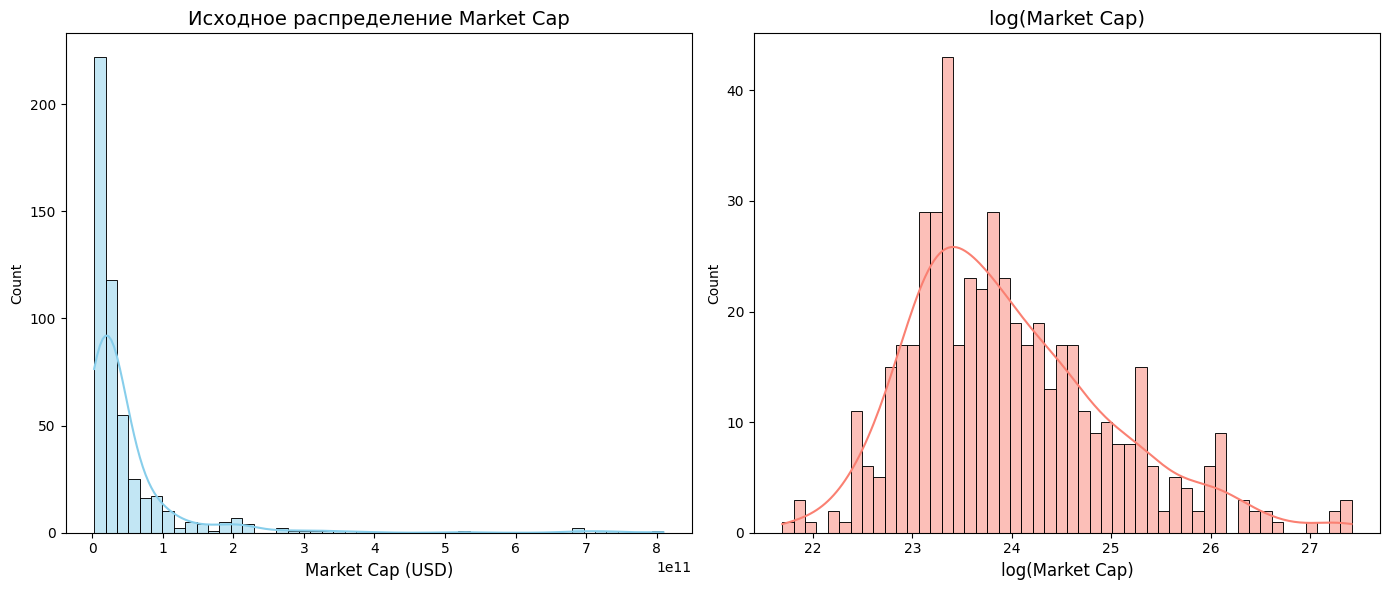

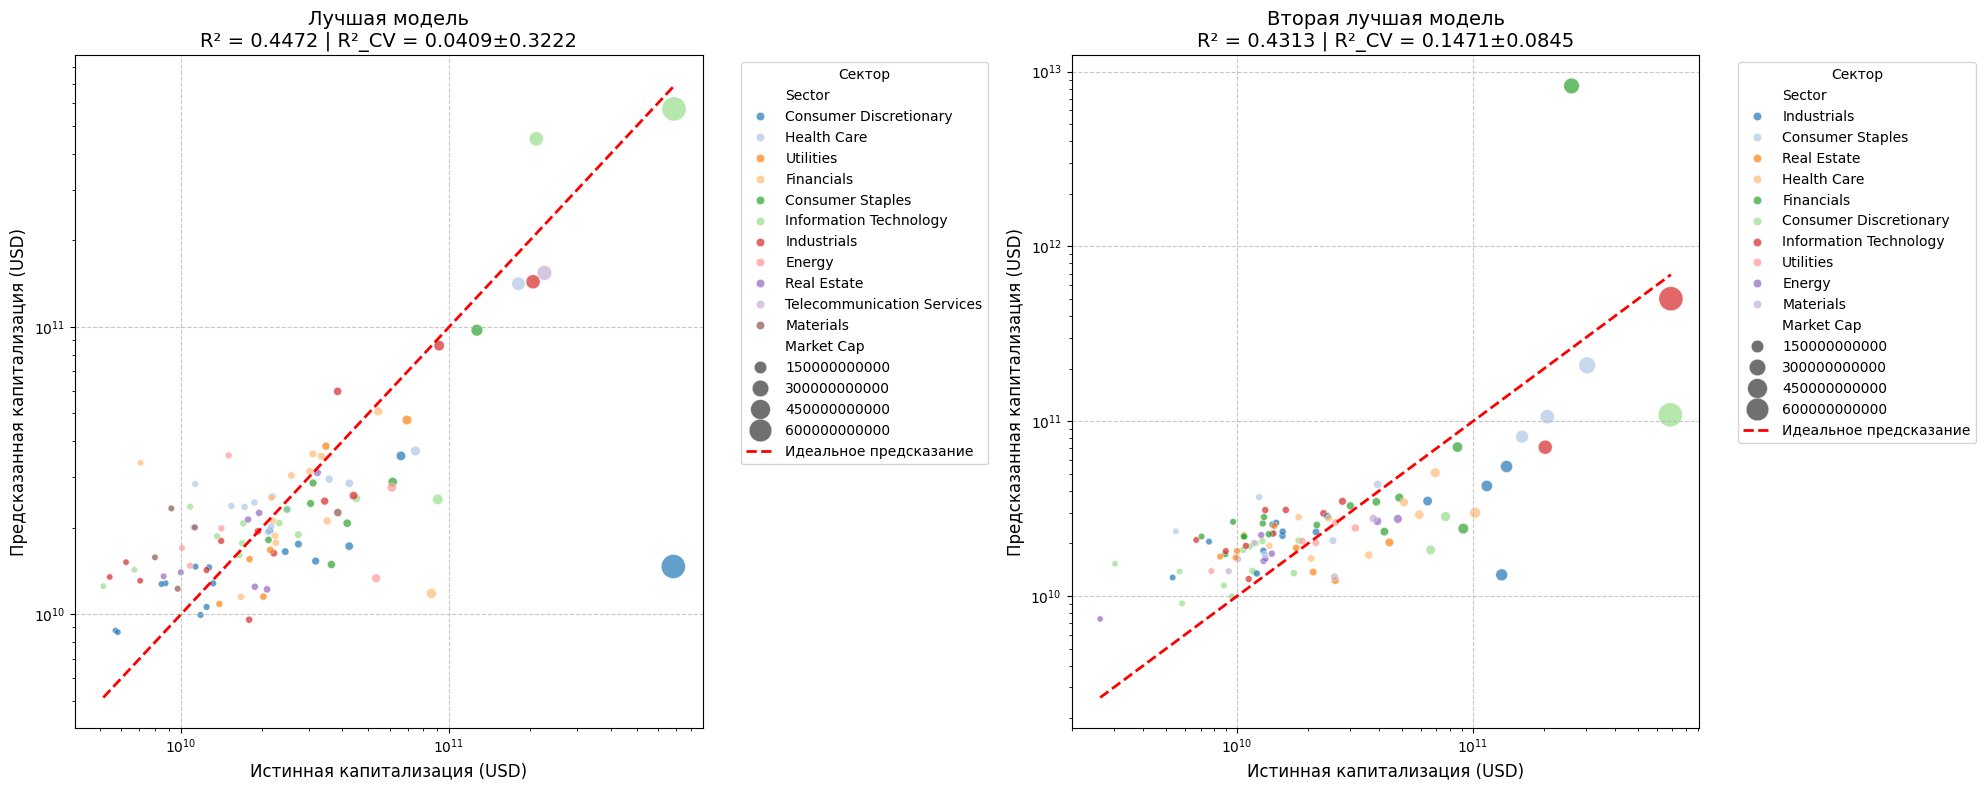

/tmp/ipython-input-3188347855.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=error_df_best, x='Абс. ошибка', y='Сектор', palette='Set3', ax=ax1)
/tmp/ipython-input-3188347855.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=error_df_second, x='Абс. ошибка', y='Сектор', palette='Set3', ax=ax2)


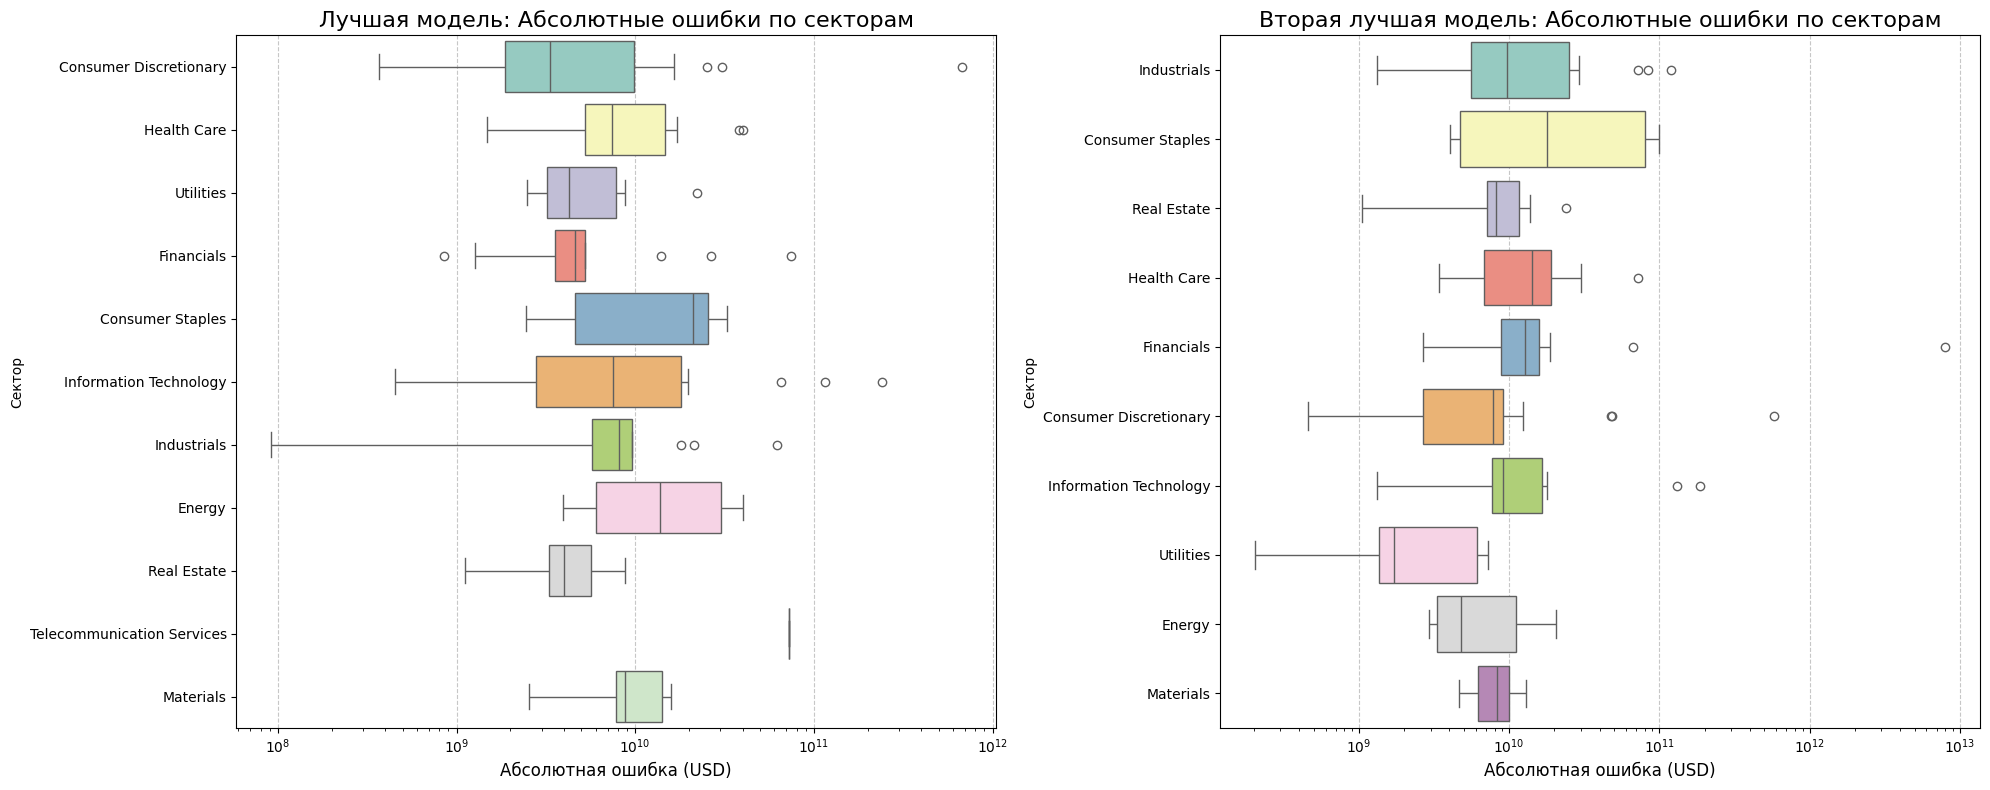

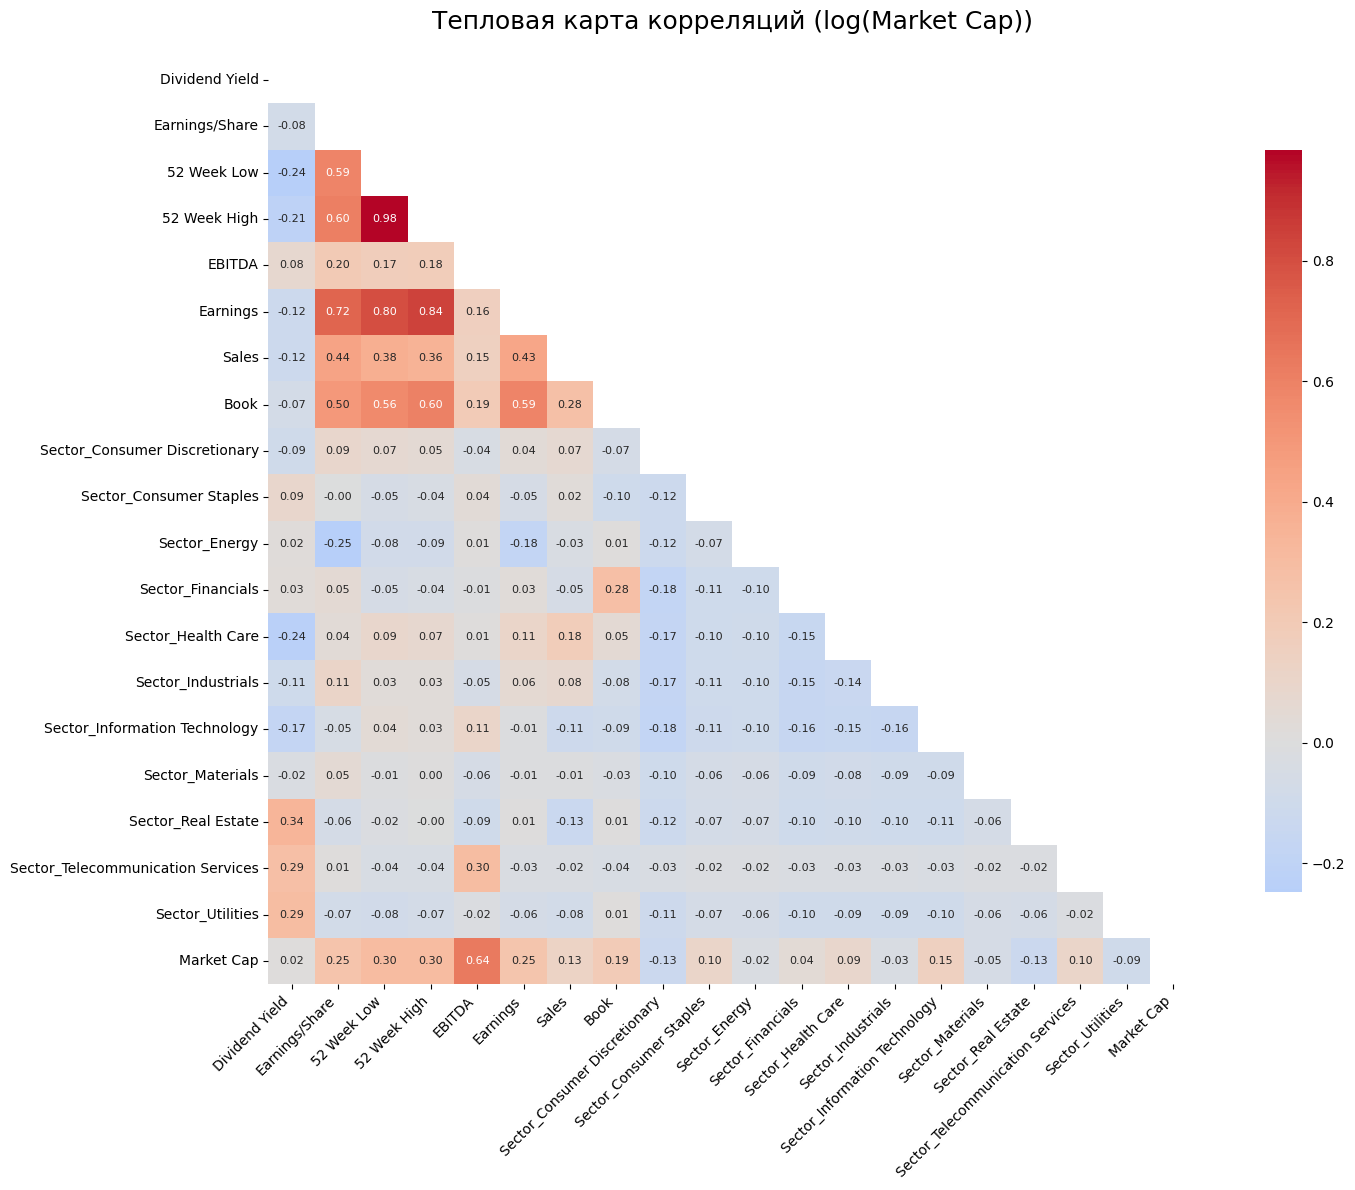


Все графики построены для интерпретации модели.


In [ ]:
if not all_results:
    print("Нет успешных моделей для визуализации")
else:
    results_df = pd.DataFrame(all_results)
    results_df = results_df.sort_values('R2_test', ascending=False).reset_index(drop=True)

    # Сводная таблица
    print("\n" + "="*120)
    print("СВОДНАЯ ТАБЛИЦА МОДЕЛЕЙ (СТРАТИФИЦИРОВАННАЯ ПО СЕКТОРАМ)")
    print("="*120)
    display(results_df.style.background_gradient(cmap='coolwarm', subset=['R2_test', 'R2_CV_mean']))

    # Две лучшие модели
    best_row = results_df.iloc[0]
    second_best_row = results_df.iloc[1] if len(results_df) > 1 else None

    print("\n" + "="*80)
    print("ЛУЧШАЯ МОДЕЛЬ")
    print("="*80)
    print(best_row.to_string())

    if second_best_row is not None:
        print("\n" + "="*80)
        print("ВТОРАЯ ЛУЧШАЯ МОДЕЛЬ")
        print("="*80)
        print(second_best_row.to_string())

    # 1. Распределение Market Cap (общий для всех моделей)
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_encoded['Market Cap'], bins=50, kde=True, color='skyblue')
    plt.title('Исходное распределение Market Cap', fontsize=14)
    plt.xlabel('Market Cap (USD)', fontsize=12)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df_encoded['Market Cap']), bins=50, kde=True, color='salmon')
    plt.title('log(Market Cap)', fontsize=14)
    plt.xlabel('log(Market Cap)', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 2. Истинные vs Предсказанные - СРАВНЕНИЕ ДВУХ МОДЕЛЕЙ
    fig, axes = plt.subplots(1, 2 if second_best_row is not None else 1, figsize=(20 if second_best_row is not None else 12, 8))
    if second_best_row is None:
        axes = [axes]

    # Первая модель
    ax1 = axes[0]
    sns.scatterplot(
        x=best_model_info['y_test_orig'],
        y=best_model_info['y_pred_orig'],
        hue=best_model_info['test_sectors'],
        palette='tab20',
        size=best_model_info['y_test_orig'],
        sizes=(20, 300),
        alpha=0.7,
        ax=ax1
    )
    ax1.plot([best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
             [best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
             'r--', linewidth=2, label='Идеальное предсказание')
    ax1.set_title(f'Лучшая модель\nR² = {best_row["R2_test"]:.4f} | R²_CV = {best_row["R2_CV_mean"]:.4f}±{best_row["R2_CV_std"]:.4f}', fontsize=14)
    ax1.set_xlabel('Истинная капитализация (USD)', fontsize=12)
    ax1.set_ylabel('Предсказанная капитализация (USD)', fontsize=12)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(title='Сектор', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Вторая модель (если есть)
    if second_best_row is not None:
        # Найдем информацию о второй модели
        second_model_info = None
        for result in all_results:
            if (result['Dataset'] == second_best_row['Dataset'] and
                result['Scaler'] == second_best_row['Scaler'] and
                result['Kernel'] == second_best_row['Kernel'] and
                result['R2_test'] == second_best_row['R2_test']):
                # Пересоздаем предсказания для второй модели (упрощенный подход)
                try:
                    # Находим соответствующий пайплайн из GridSearch
                    # Для простоты пересоздадим модель (в реальном коде лучше сохранять все модели)
                    from sklearn.pipeline import Pipeline

                    # Получаем исходные данные второй модели
                    X_second, y_second, is_log_y_second = datasets[second_best_row['Dataset']]
                    X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(
                        X_second, y_second, test_size=0.2, random_state=42
                    )

                    # Создаем пайплайн второй модели
                    scaler_second = scalers[second_best_row['Scaler']]
                    kernel_second = second_best_row['Kernel']
                    params_second = eval(second_best_row['Best_Params'])

                    pipe_second = Pipeline([
                        ('scaler', scaler_second),
                        ('svr', SVR(kernel=kernel_second, **{k.replace('svr__', ''): v for k, v in params_second.items()}))
                    ])

                    # Обучаем и предсказываем
                    pipe_second.fit(X_train_second, y_train_second)
                    y_pred_second = pipe_second.predict(X_test_second)

                    # Обратное преобразование
                    if is_log_y_second:
                        y_test_second_orig = np.exp(y_test_second)
                        y_pred_second_orig = np.exp(y_pred_second)
                    else:
                        y_test_second_orig = y_test_second
                        y_pred_second_orig = y_pred_second

                    # Создаем second_model_info
                    second_model_info = {
                        'y_test_orig': y_test_second_orig,
                        'y_pred_orig': y_pred_second_orig,
                        'test_sectors': original_sectors.loc[X_test_second.index]  # Используем оригинальные сектора
                    }
                    break
                except Exception as e:
                    print(f"Не удалось воссоздать вторую модель для визуализации: {e}")
                    second_model_info = None
                    break

        if second_model_info is not None:
            ax2 = axes[1]
            sns.scatterplot(
                x=second_model_info['y_test_orig'],
                y=second_model_info['y_pred_orig'],
                hue=second_model_info['test_sectors'],
                palette='tab20',
                size=second_model_info['y_test_orig'],
                sizes=(20, 300),
                alpha=0.7,
                ax=ax2
            )
            ax2.plot([second_model_info['y_test_orig'].min(), second_model_info['y_test_orig'].max()],
                     [second_model_info['y_test_orig'].min(), second_model_info['y_test_orig'].max()],
                     'r--', linewidth=2, label='Идеальное предсказание')
            ax2.set_title(f'Вторая лучшая модель\nR² = {second_best_row["R2_test"]:.4f} | R²_CV = {second_best_row["R2_CV_mean"]:.4f}±{second_best_row["R2_CV_std"]:.4f}', fontsize=14)
            ax2.set_xlabel('Истинная капитализация (USD)', fontsize=12)
            ax2.set_ylabel('Предсказанная капитализация (USD)', fontsize=12)
            ax2.set_xscale('log')
            ax2.set_yscale('log')
            ax2.grid(True, linestyle='--', alpha=0.7)
            ax2.legend(title='Сектор', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            # Если не удалось воссоздать вторую модель, показываем только первую
            plt.close(fig)
            fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
            sns.scatterplot(
                x=best_model_info['y_test_orig'],
                y=best_model_info['y_pred_orig'],
                hue=best_model_info['test_sectors'],
                palette='tab20',
                size=best_model_info['y_test_orig'],
                sizes=(20, 300),
                alpha=0.7,
                ax=ax1
            )
            ax1.plot([best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
                     [best_model_info['y_test_orig'].min(), best_model_info['y_test_orig'].max()],
                     'r--', linewidth=2, label='Идеальное предсказание')
            ax1.set_title(f'Лучшая модель\nR² = {best_row["R2_test"]:.4f} | R²_CV = {best_row["R2_CV_mean"]:.4f}±{best_row["R2_CV_std"]:.4f}', fontsize=14)
            ax1.set_xlabel('Истинная капитализация (USD)', fontsize=12)
            ax1.set_ylabel('Предсказанная капитализация (USD)', fontsize=12)
            ax1.set_xscale('log')
            ax1.set_yscale('log')
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.legend(title='Сектор', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # 3. Ошибки по секторам - СРАВНЕНИЕ ДВУХ МОДЕЛЕЙ
    fig, axes = plt.subplots(1, 2 if second_best_row is not None and 'second_model_info' in locals() and second_model_info is not None else 1, figsize=(20 if second_best_row is not None else 14, 8))
    if not (second_best_row is not None and 'second_model_info' in locals() and second_model_info is not None):
        axes = [axes]

    # Ошибки лучшей модели
    residuals_best = best_model_info['y_test_orig'] - best_model_info['y_pred_orig']
    error_df_best = pd.DataFrame({
        'Сектор': best_model_info['test_sectors'].values,
        'Ошибка': residuals_best.values,
        'Абс. ошибка': np.abs(residuals_best).values
    })

    ax1 = axes[0] if isinstance(axes, (list, np.ndarray)) else axes
    sns.boxplot(data=error_df_best, x='Абс. ошибка', y='Сектор', palette='Set3', ax=ax1)
    ax1.set_title('Лучшая модель: Абсолютные ошибки по секторам', fontsize=16)
    ax1.set_xlabel('Абсолютная ошибка (USD)', fontsize=12)
    ax1.set_xscale('log')
    ax1.grid(axis='x', linestyle='--', alpha=0.7)

    # Ошибки второй модели (если есть)
    if second_best_row is not None and 'second_model_info' in locals() and second_model_info is not None:
        residuals_second = second_model_info['y_test_orig'] - second_model_info['y_pred_orig']
        error_df_second = pd.DataFrame({
            'Сектор': second_model_info['test_sectors'].values,
            'Ошибка': residuals_second.values,
            'Абс. ошибка': np.abs(residuals_second).values
        })

        ax2 = axes[1]
        sns.boxplot(data=error_df_second, x='Абс. ошибка', y='Сектор', palette='Set3', ax=ax2)
        ax2.set_title('Вторая лучшая модель: Абсолютные ошибки по секторам', fontsize=16)
        ax2.set_xlabel('Абсолютная ошибка (USD)', fontsize=12)
        ax2.set_xscale('log')
        ax2.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # 4. Тепловая карта корреляций (общая для всех)
    plt.figure(figsize=(16, 12))
    num_cols = [col for col in df_encoded.columns if col not in df_encoded.select_dtypes('object').columns and col != 'Market Cap']
    num_cols = [col for col in num_cols if df_encoded[col].dtype in ['float64', 'int64']]

    corr_df = df_encoded[num_cols + ['Market Cap']].copy()
    corr_df['Market Cap'] = np.log1p(corr_df['Market Cap'])

    corr = corr_df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                square=True, cbar_kws={"shrink": .8}, annot_kws={"size": 8})
    plt.title('Тепловая карта корреляций (log(Market Cap))', fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

print("\n" + "="*100)
print("Все графики построены для интерпретации модели.")
print("="*100)

# Вывод с StratifiedGroupKFold

## Лучшая модель (по R² на тесте)
**Тип данных**: Log_Target  
→ Только целевая переменная (Market Cap) логарифмирована

**Скейлер**: MinMaxScaler  
→ Масштабирует признаки в диапазон [0, 1]

**Ядро**: RBF (радиально-базисное)  
→ Нелинейная модель, способная улавливать сложные зависимости

**Гиперпараметры**:
- `C = 10` — умеренная сложность модели
- `gamma = 5` — высокая чувствительность к отдельным точкам
- `epsilon = 0.2` — широкая ε-трубка

### Качество модели:
- **R² на тесте**: 0.4472 (наивысший показатель)
- **R² по кросс-валидации**: 0.0409 ± 0.3222  
  → Крайне высокая нестабильность (стандартное отклонение > 7× среднего значения!)
- **RMSE**: 74.3 млрд USD
- **MAE**: 21.5 млрд USD
- **Время обучения**: 10.6 сек (очень быстро)

---

## Вторая лучшая модель (по стабильности)
**Тип данных**: Log_Features_and_Target  
→ И признаки, и целевая переменная логарифмированы

**Скейлер**: StandardScaler  
→ Центрирует и масштабирует признаки (среднее = 0, std = 1)

**Ядро**: linear  
→ Линейная модель, интерпретируемая и устойчивая

**Гиперпараметры**:
- `C = 0.01` — сильная регуляризация (простая модель)
- `epsilon = 0.5` — очень широкая ε-трубка

### Качество модели:
- **R² на тесте**: 0.4313 (лишь на 1.6% хуже лучшей модели)
- **R² по кросс-валидации**: 0.1471 ± 0.0845  
  → В 3.8 раза более стабильна (R²_CV_std = 0.0845 против 0.3222)
- **RMSE**: 75.3 млрд USD (почти идентично)
- **MAE**: 25.0 млрд USD (чуть выше)
- **Время обучения**: 122.2 сек (в 11.5 раз дольше)

---

## Ключевые выводы

### Качество vs Стабильность
- **Лучшая модель (RBF)**: максимальное качество на тесте, но крайне нестабильна при кросс-валидации
- **Вторая модель (линейная)**: почти такое же качество, но значительно более надёжна и предсказуема

**Проблемы с RBF-моделью**:
- Высокое значение `gamma = 5` указывает на переобучение на отдельные точки
- Стандартное отклонение R² по CV превышает среднее значение в 8 раз — модель ненадёжна
- Возможна утечка данных или неудачное разбиение на фолды

### Следующие шаги для улучшения:

**Общие улучшения**:

- Рассмотреть ансамбли (XGBoost)

---

## Заключение
Несмотря на формально лучший R² на тесте, **линейная модель с логарифмированными данными** является предпочтительным выбором для практического применения в финансовом анализе благодаря своей **стабильности, интерпретируемости и надёжности**.

> **Качество без стабильности — это иллюзия.  
> Стабильность с хорошим качеством — это надёжность.**